**Data Analysis1**

* 1) Perform general Data analysis
* 2) Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot
* 3) Create a plot based on the Variation of the price range by the vehicle type
* 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client
* 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)


#### 1) Perform general Data analysis

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [2]:
df= pd.read_csv(r"C:\Users\udayk\Downloads\autos.csv",encoding="unicode_escape")

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


### Data Cleaning

In [4]:
#As there is all zeros in this column so the variance is zero.

df["nrOfPictures"].unique()    

array([0], dtype=int64)

In [5]:
#Dropping this column because it does not contribute any information to analysis.

df.drop("nrOfPictures",axis=1,inplace=True)

#### Missing Values

In [6]:
#Checking for the missing values

df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
#Dropping all the missing values

df.dropna(axis= 0, inplace= True)

In [8]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

#### Duplicates

In [9]:
#Checking for duplicates, there are 4 duplicate records.

sum(df.duplicated())

4

In [10]:
df.drop_duplicates(inplace =True) #Dropping the duplicates for the accurate analysis.

In [11]:
sum(df.duplicated())

0

### Outliers

In [12]:
df1 = df.select_dtypes(exclude="object")

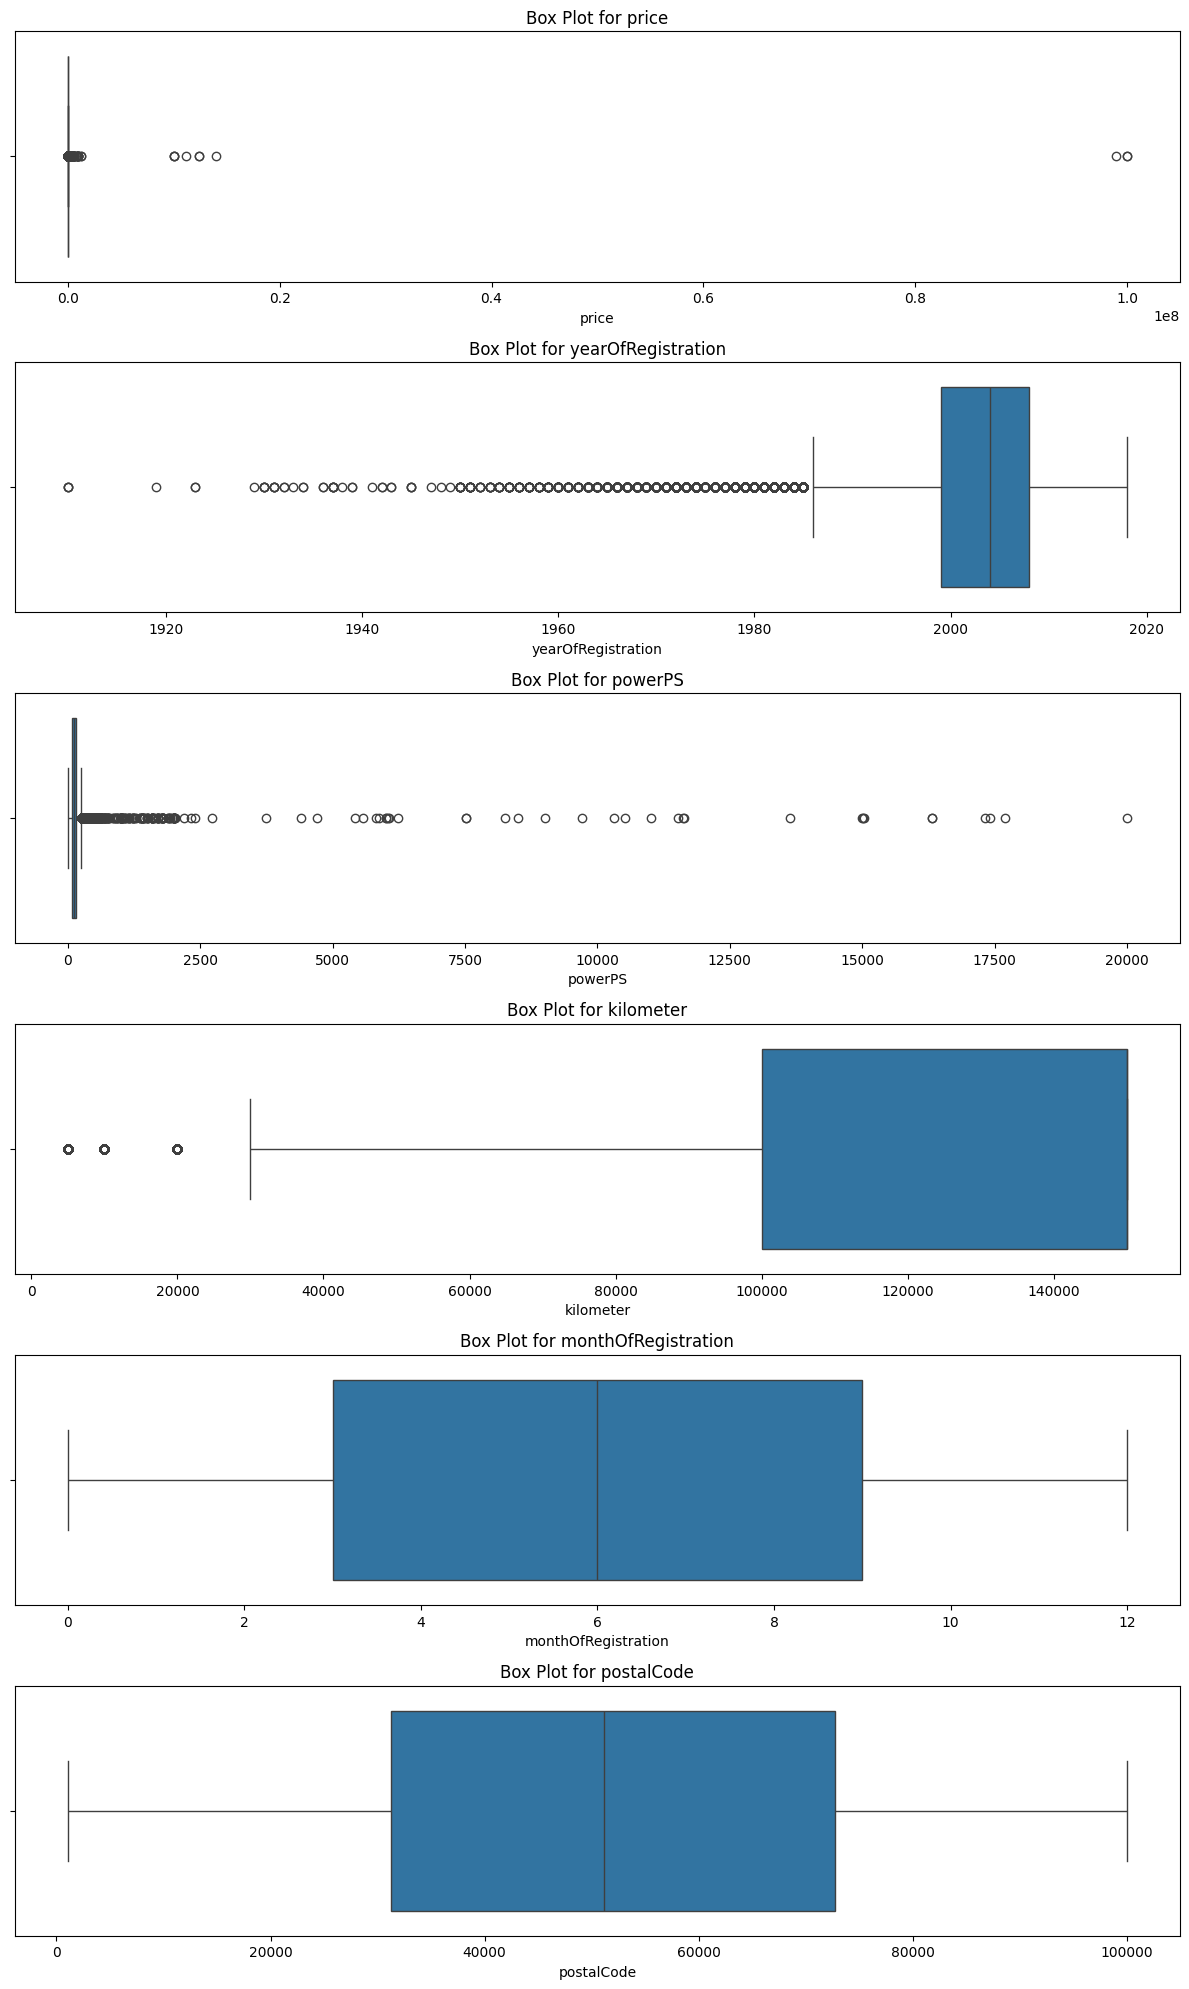

In [13]:
fig, axes = plt.subplots(nrows=len(df1.columns), figsize=(12, 20))

for i, column in enumerate(df1.columns):
    sns.boxplot(x=df1[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

### Outlier Treatment

**`For Price`**

In [14]:
#Checking for the outliers count

len(df[(df['price']>500000)|(df['price']<500)].index)

12864

In [15]:
#Dropping the outliers

df.drop(df[(df['price']>500000)|(df['price']<500)].index, inplace=True)

**`For yearOfRegistration`**

In [16]:
#The first car registered in Germany was in 1886.
#The year of registration less than 1886 and greater than 2023 can be treated as outlier.

year= df[(df["yearOfRegistration"]<1886) | (df["yearOfRegistration"]>2023)]

In [17]:
#Dropping the outliers

df= df.drop(year.index) 

**`For powerPS`**

In [18]:
#The PowerPS values can be range between 1 to 2400
#The values less than 1 and values greater than 2400 can be treated as outliers

cond= (df["powerPS"]>2400)|(df["powerPS"]<1)

In [19]:
#The outliers can be replaced with median

df["powerPS"]= np.where(cond,df["powerPS"].median(),df["powerPS"])

### Structural Errors

In [20]:
#Checking for the Structural Errors

for i in df.columns:
    print(f"{i} = {df[i].unique()}")
    print()

dateCrawled = ['2016-03-17 16:54:04' '2016-03-31 17:25:20' '2016-04-04 17:36:23' ...
 '2016-03-27 20:36:20' '2016-03-19 18:57:12' '2016-03-07 19:39:19']

name = ['GOLF_4_1_4__3TÜRER' 'Skoda_Fabia_1.4_TDI_PD_Classic'
 'BMW_316i___e36_Limousine___Bastlerfahrzeug__Export' ... 'turbo_defekt'
 'Smart_smart_leistungssteigerung_100ps'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']

seller = ['privat' 'gewerblich']

offerType = ['Angebot' 'Gesuch']

price = [ 1500  3600   650 ...  1559 10985 14989]

abtest = ['test' 'control']

vehicleType = ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']

yearOfRegistration = [2001 2008 1995 2004 2005 2011 2007 2009 2002 1990 1981 2003 1984 1999
 1998 2012 2014 2006 2010 2000 1993 2013 1994 1997 1991 1996 1989 2015
 1968 1992 1983 1959 1973 1969 1971 1987 1988 1967 2016 1980 1986 1985
 1965 1945 1974 1979 1982 1978 1976 1972 1977 1966 1975 1970 1937 1963
 1936 1962 1960 1951 1964 1953 1954 1957 1958 1956 2017 1961 1955 1950
 1948 19

lastSeen = ['2016-03-17 17:40:17' '2016-04-06 10:17:21' '2016-04-06 19:17:07' ...
 '2016-04-02 18:16:20' '2016-03-19 20:44:43' '2016-03-29 10:17:23']



In [21]:
df["monthOfRegistration"].unique()

array([ 6,  7, 10,  8, 12,  3,  2,  1,  4,  9, 11,  5,  0], dtype=int64)

In [22]:
df["monthOfRegistration"].mode()[0]

3

In [23]:
#Replacing the 0 with mode because there is no zero month.

df['monthOfRegistration']= df['monthOfRegistration'].replace(0,df["monthOfRegistration"].mode()[0])

In [24]:
df["monthOfRegistration"].unique()

array([ 6,  7, 10,  8, 12,  3,  2,  1,  4,  9, 11,  5], dtype=int64)

### Type Casting

In [25]:
df.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration       int64
gearbox                 object
powerPS                float64
model                   object
kilometer                int64
monthOfRegistration      int64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
postalCode               int64
lastSeen                object
dtype: object

In [26]:
df["dateCrawled"] = df["dateCrawled"].astype("datetime64[ns]")

df["dateCreated"] = df["dateCreated"].astype("datetime64[ns]")

df["lastSeen"]= df["lastSeen"].astype("datetime64[ns]")

df["postalCode"]= df["postalCode"].astype("object")

df["yearOfRegistration"]= df['yearOfRegistration'].astype("object")

df["monthOfRegistration"]= df["monthOfRegistration"].astype("object")

In [27]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration             object
gearbox                        object
powerPS                       float64
model                          object
kilometer                       int64
monthOfRegistration            object
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                     object
lastSeen               datetime64[ns]
dtype: object

### Cleaned DataFrame

In [28]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75.0,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69.0,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102.0,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109.0,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105.0,3_reihe,150000,12,benzin,mazda,nein,2016-03-26,96224,2016-04-06 10:45:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,privat,Angebot,3200,control,limousine,2004,manuell,225.0,leon,150000,5,benzin,seat,ja,2016-03-19,96465,2016-03-19 20:44:43
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,116.0,zafira,150000,3,benzin,opel,nein,2016-03-27,26624,2016-03-29 10:17:23
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101.0,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102.0,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07 07:15:26


In [29]:
#Saving the cleaned DataFrame into csv format for further analysis

df.to_csv("df_cleaned.csv")

#### 2. Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

<Axes: xlabel='yearOfRegistration', ylabel='Density'>

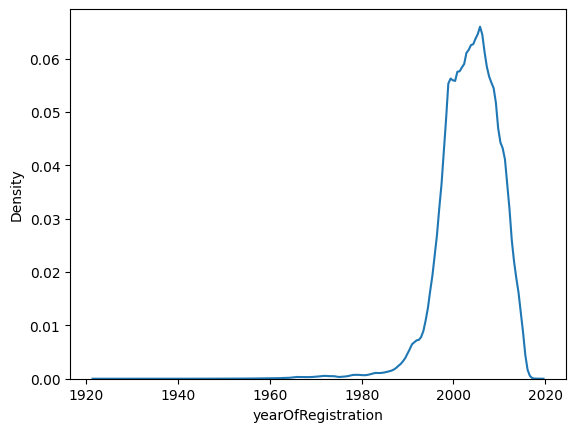

In [30]:
sns.kdeplot(data=df,x="yearOfRegistration")

#### conclusion:
* yearofRegistration is **`Left Skewed Distribution`** because more data points on the right side and the long tail extending to the left side.

#### 3.Create a plot based on the Variation of the price range by the vehicle type

<Axes: xlabel='vehicleType'>

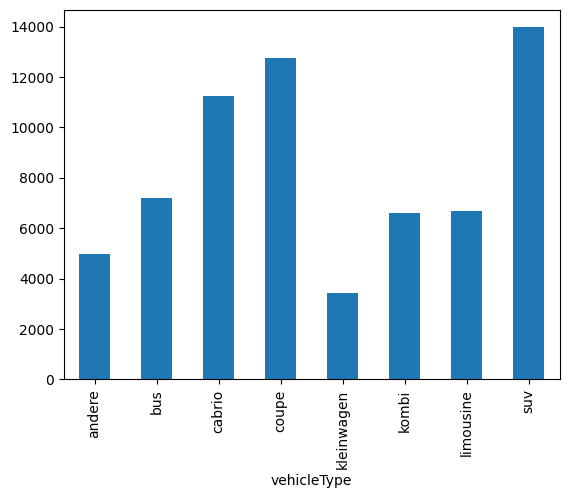

In [31]:
df.groupby("vehicleType")["price"].mean().plot(kind="bar")

#### counclusion:  
* On an average,The highest price for a vehicle is 14000 for suv and lowest price for a vehicle is around 3000 for kleinwagen.

#### 4. Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [32]:
#Total count of vehicles by type

df["vehicleType"].value_counts()

vehicleType
limousine     73309
kleinwagen    53422
kombi         51133
bus           24470
cabrio        18271
coupe         13968
suv           11955
andere         1560
Name: count, dtype: int64

<Axes: xlabel='vehicleType', ylabel='Count of Vehicles'>

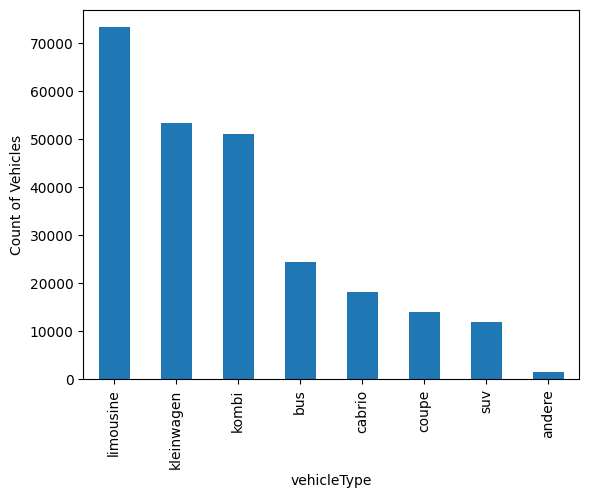

In [33]:
df["vehicleType"].value_counts().plot(kind="bar",ylabel = "Count of Vehicles")

#### conclusion:
* As per the data,limousine is the most repeated vehicle type and it's count is around 75000.
* Andere(others) are the least repeated vehicle type and it's count is around 1600.

#### 5. Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [34]:
df.corr(numeric_only=True)

,price,powerPS,kilometer
price,1.000000,0.501666,-0.421154
powerPS,0.501666,1.000000,-0.012793
kilometer,-0.421154,-0.012793,1.000000


<Axes: >

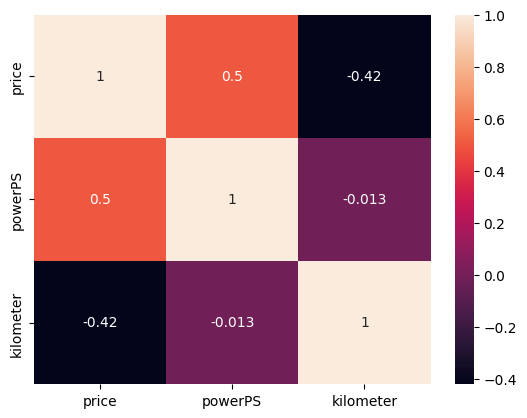

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#### conclusion:
* According to the given data,The relationship is negative weak relationship. 
* Which means if the kilometers that car travelled is increased the price decreases and if the kilometers travelled by the car is less then the price of the car is high.